### Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Deep Learning Polimi/1/Notebooks

Mounted at /gdrive
/gdrive/My Drive/Deep Learning Polimi/1/Notebooks


### Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
#import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.8.0


### Set seed for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load data 

**Boston Housing Dataset**

Features:

* **CRIM**:     per capita crime rate by town
* **ZN**:       proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**:    proportion of non-retail business acres per town
* **CHAS**:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**:      nitric oxides concentration (parts per 10 million)
* **RM**:       average number of rooms per dwelling
* **AGE**:      proportion of owner-occupied units built prior to 1940
* **DIS**:      weighted distances to five Boston employment centres
* **RAD**:      index of accessibility to radial highways
* **TAX**:      full-value property-tax rate per \$10,000
* **PTRATIO**:  pupil-teacher ratio by town
* **B**:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**:    % lower status of the population

Target:

* **MEDV**:     Median value of owner-occupied homes in $1000's


In [ ]:
data = load_boston()
# print(data.DESCR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_dataset = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])
print('Boston dataset shape',boston_dataset.shape)
print('Target shape', target.shape)
boston_dataset.describe()

Boston dataset shape (506, 13)
Target shape (506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Split in train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset, target, test_size = 0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


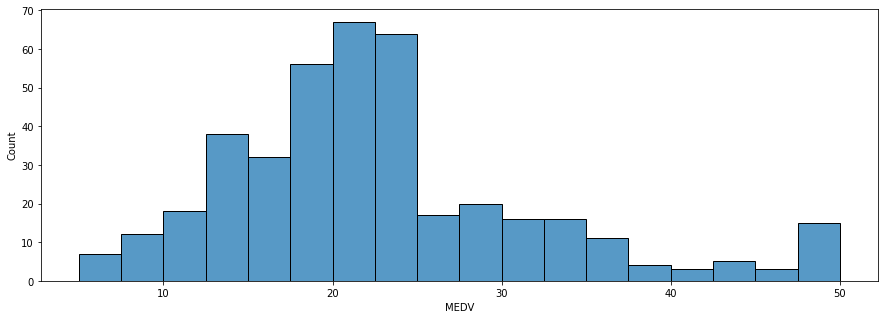

In [ ]:
# Inspect the target
#mpl.rcParams.update(mpl.rcParamsDefault)
#sns.set(font_scale=1.1, style=None, palette='Set2')
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

### Process data

In [ ]:
# Normalize both features and target
max_df = X_train.max()
min_df = X_train.min()
max_t = y_train.max()
min_t = y_train.min()

X_train = (X_train - min_df)/(max_df - min_df)
y_train = (y_train - min_t)/(max_t - min_t)

print('Boston dataset shape',X_train.shape)
print('Target shape', y_train.shape)
X_train.describe()

Boston dataset shape (404, 13)
Target shape (404, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


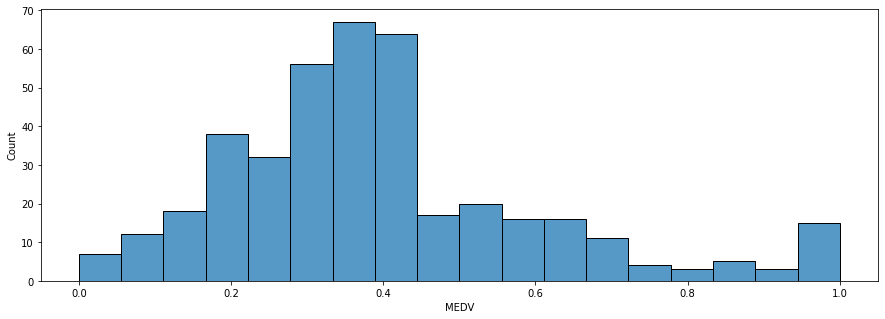

In [ ]:
# Inspect the target after normalization
#mpl.rcParams.update(mpl.rcParamsDefault)
#sns.set(font_scale=1.1, style=None, palette='Set2')
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

In [ ]:
# Normalize the test set with the same parameters of training set
X_test = (X_test - min_df)/(max_df - min_df)
y_test = (y_test - min_t)/(max_t - min_t)

### Build the model

Sum of Squared Errors (SSE):
$$\mathrm{SSE} (y, \hat{y}) = \sum^N_{n=0}(y_n - \hat{y_n})^2 = \sum^N_{n=0}(y_n - g(x_n|w))^2$$

Mean Squared Error (MSE):
$$\mathrm{MSE} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0}(y_n - \hat{y_n})^2 = \frac{\mathrm{SSE} (y, \hat{y})}{N}$$

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
def build_ffnn(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=64, activation='relu', name='Hidden1')(input_layer)
    hidden_layer2 = tfkl.Dense(units=64, activation='relu', name='Hidden2')(hidden_layer1)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output')(hidden_layer2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='FFNN')

    # Compile the model
    loss = tfk.losses.MeanSquaredError()
    learning_rate = 0.2
    optimizer = tfk.optimizers.SGD(learning_rate)
    model.compile(loss=loss, optimizer=optimizer)

    # Return the model
    return model

Model: "FFNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
Hidden1 (Dense)              (None, 64)                896       
_________________________________________________________________
Hidden2 (Dense)              (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


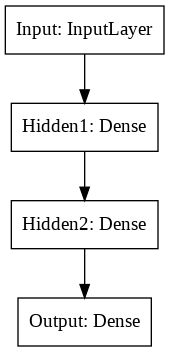

In [ ]:
ffnn = build_ffnn(input_shape)
ffnn.summary()
tfk.utils.plot_model(ffnn)

### Train the model

In [ ]:
batch_size = 64
epochs = 5000

In [ ]:
history = ffnn.fit(
    x = X_train,
    y = y_train, 
    batch_size = batch_size,
    epochs = epochs
).history

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 2502/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 2503/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2504/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2505/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2506/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2507/5000
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 2508/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 2509/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 2510/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2511/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 2512/5000
7/7 [==============================] - 0s 2ms/s

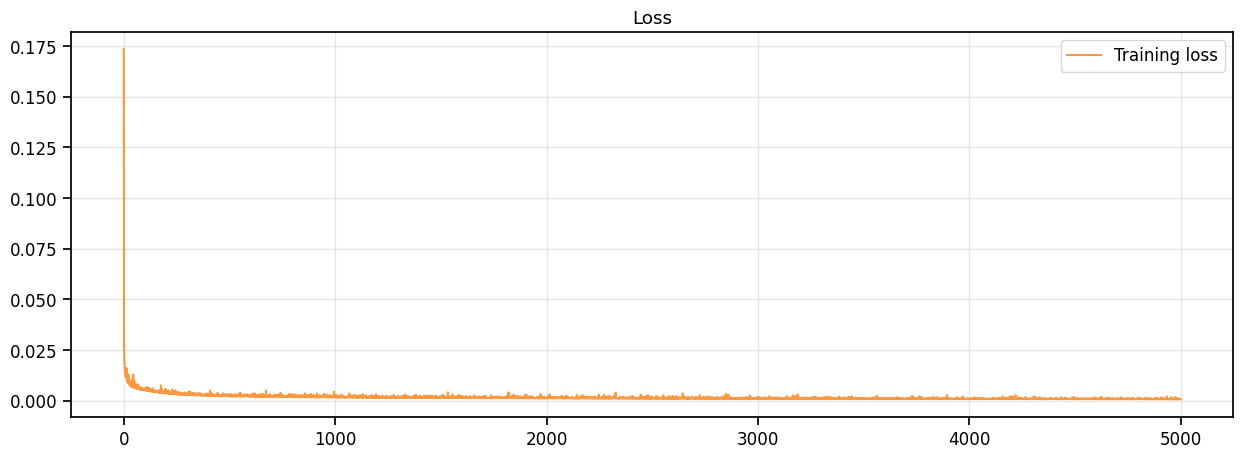

In [ ]:
#mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)

    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

Mean Squared Error (MSE): 0.0009140836864331821


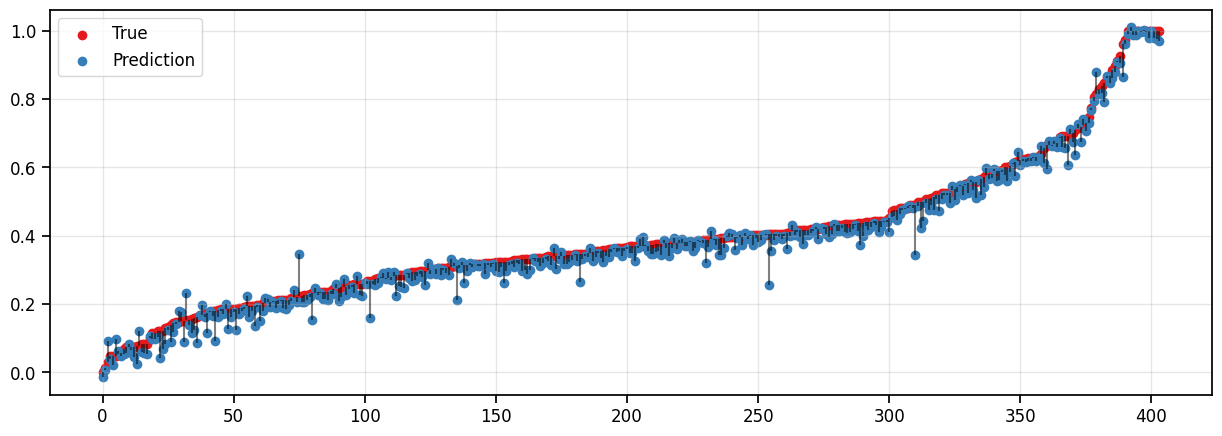

In [ ]:
plot_residuals(ffnn, X_train.copy(), y_train.copy())

Mean Squared Error (MSE): 0.004572770814330366


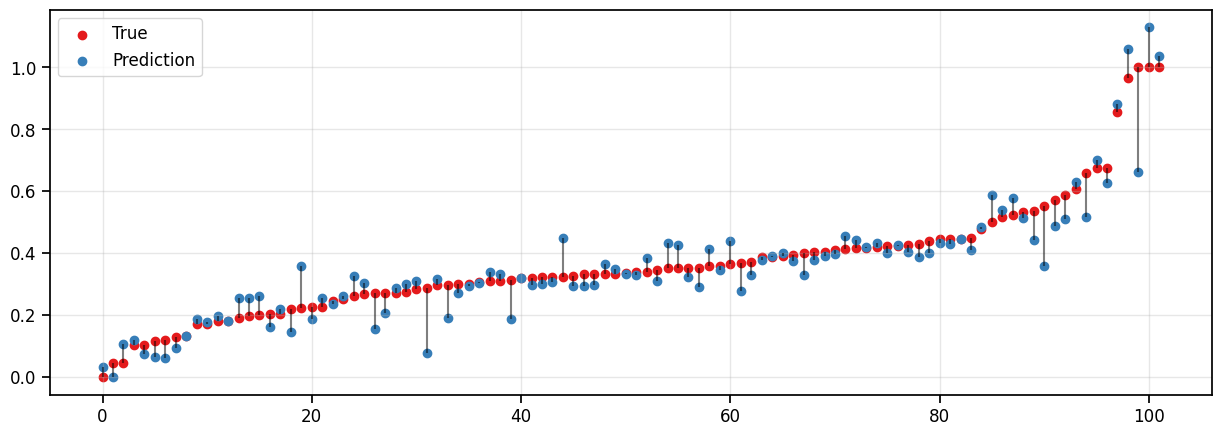

In [ ]:
plot_residuals(ffnn, X_test.copy(), y_test.copy())

In [ ]:
# Save the trained model
ffnn.save('MyFirstFFNN')

INFO:tensorflow:Assets written to: MyFirstFFNN/assets


INFO:tensorflow:Assets written to: MyFirstFFNN/assets


Guess, what is happening?